In [1]:
import torchvision
import torch
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torchvision.models.mobilenetv3 import MobileNet_V3_Large_Weights
import os
import matplotlib.pyplot as plt

SSDLite__adam_epochs_40_train_backbone_False_lr_0


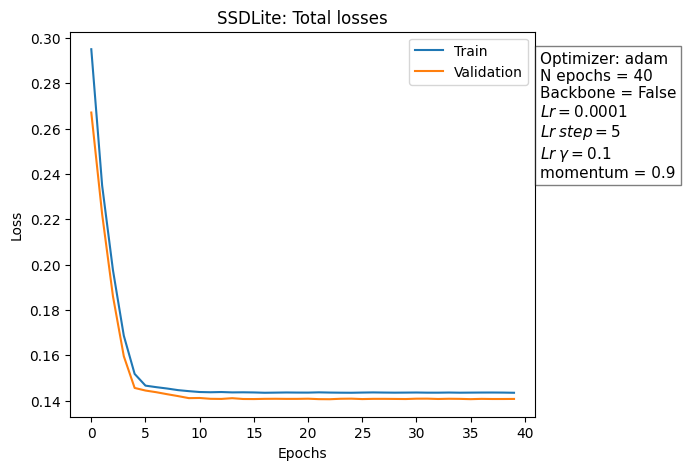

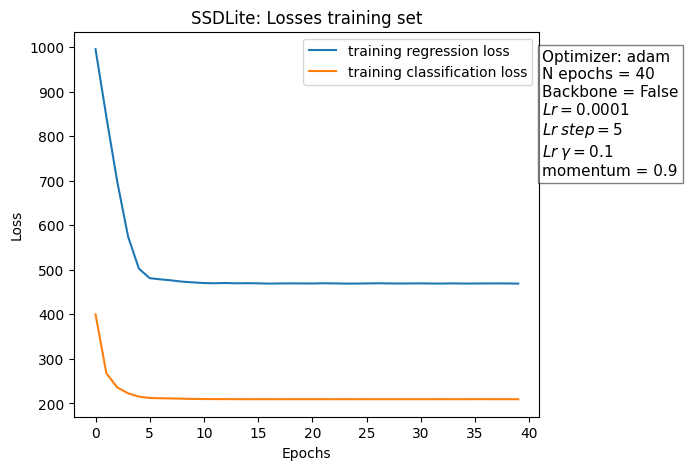

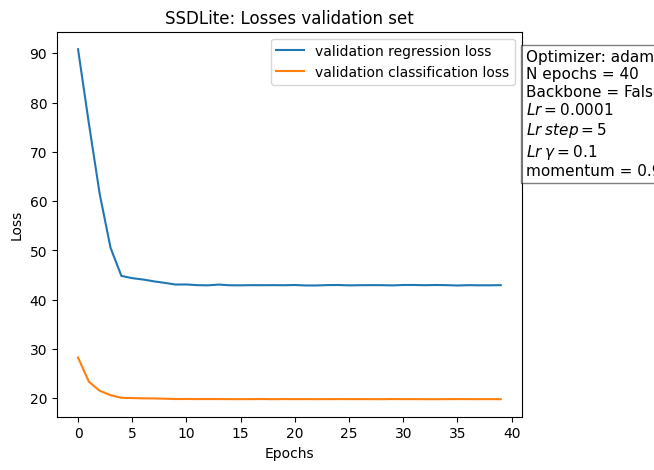

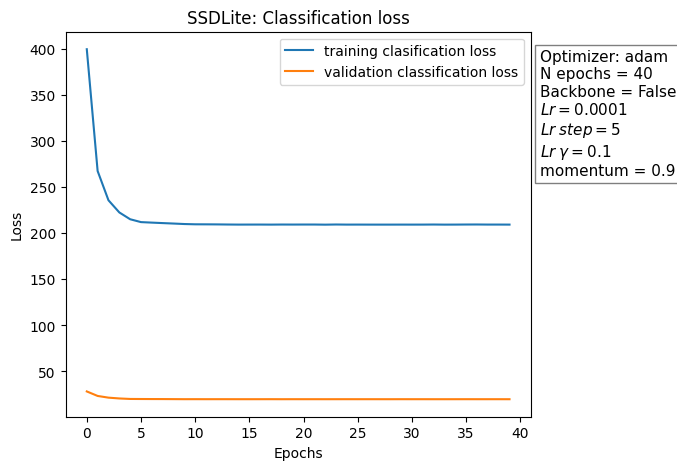

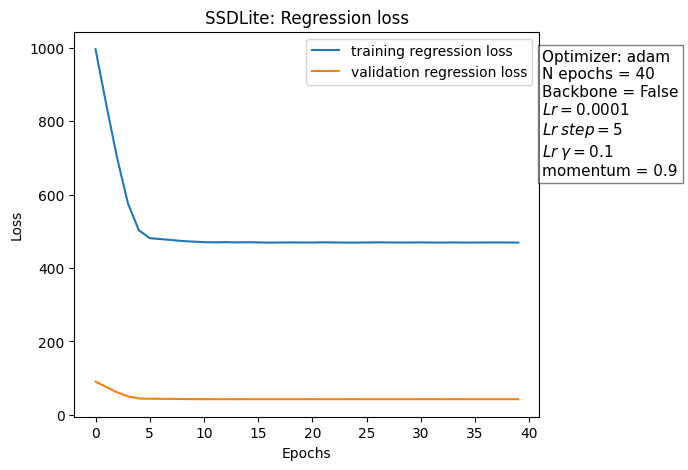

SSDLite__adam_epochs_40_train_backbone_True_lr_0


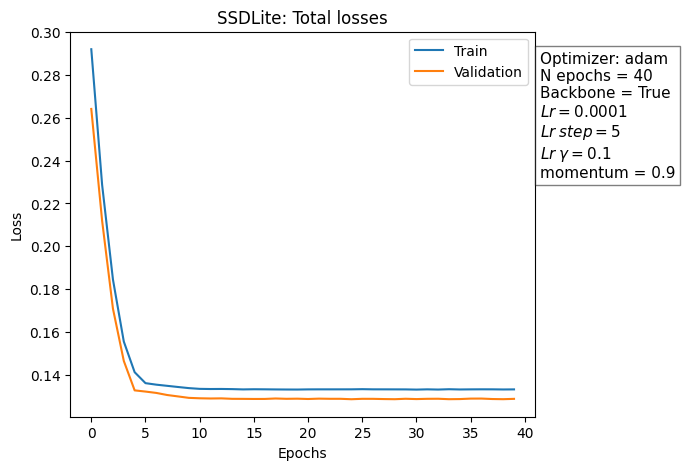

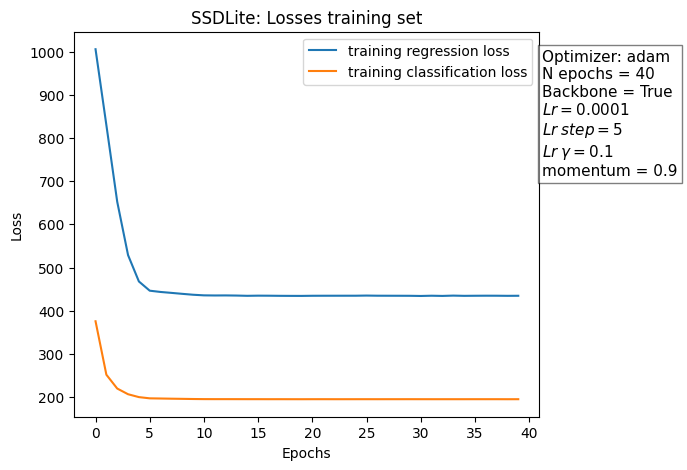

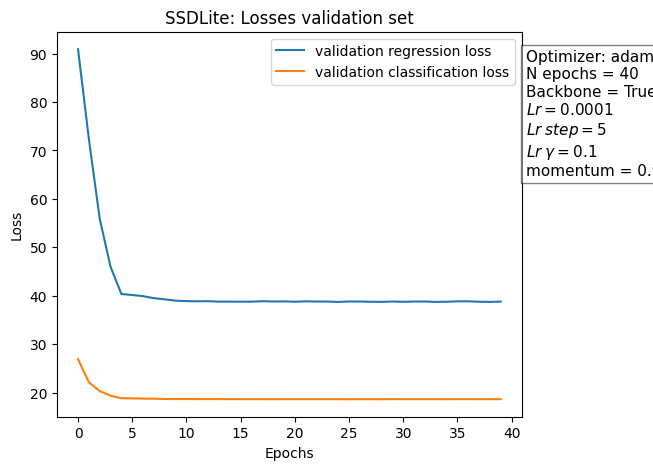

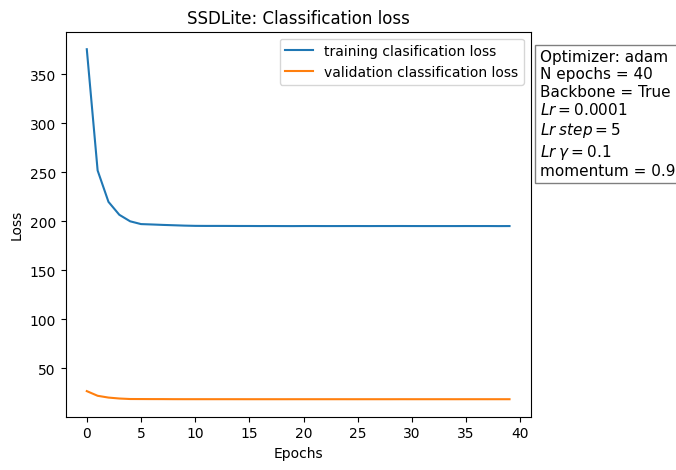

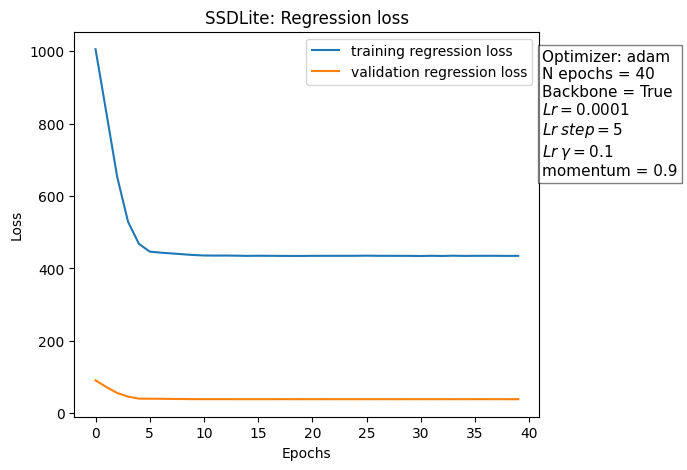

SSDLite__sgd_epochs_40_train_backbone_False_lr_0


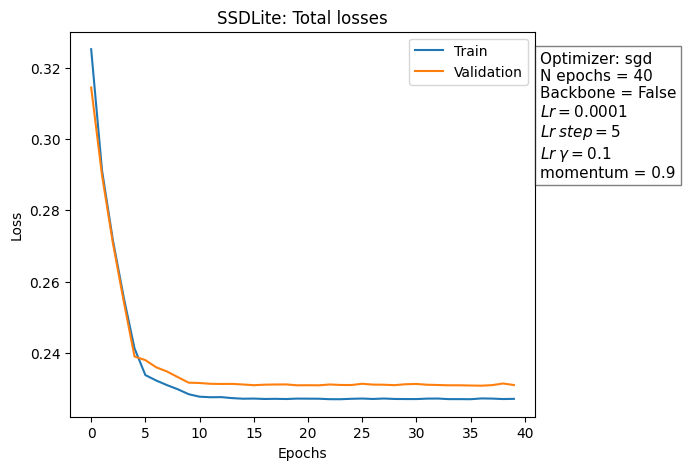

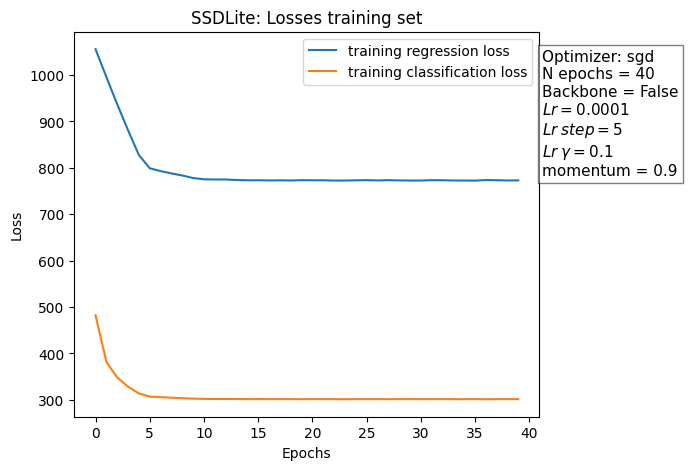

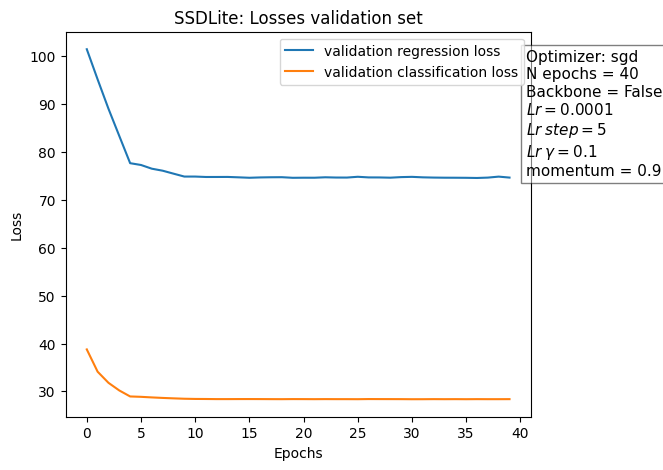

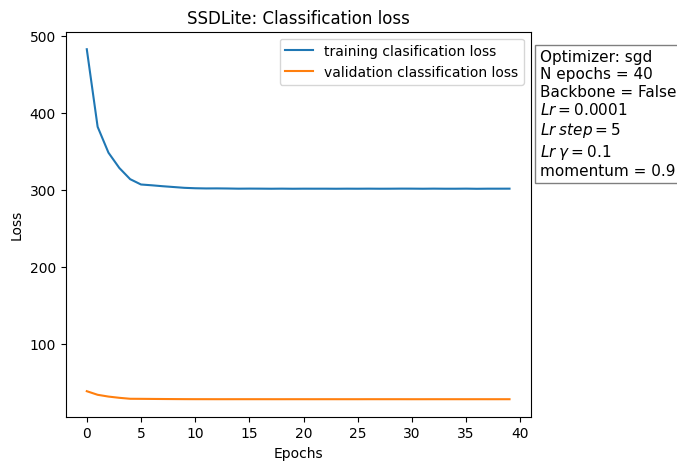

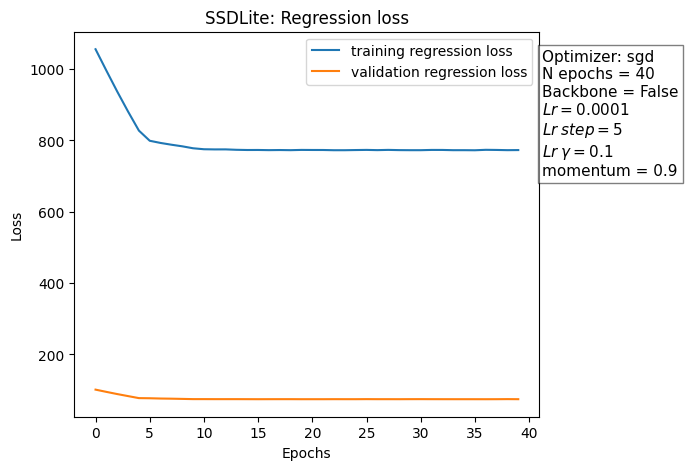

SSDLite__sgd_epochs_40_train_backbone_True_lr_0


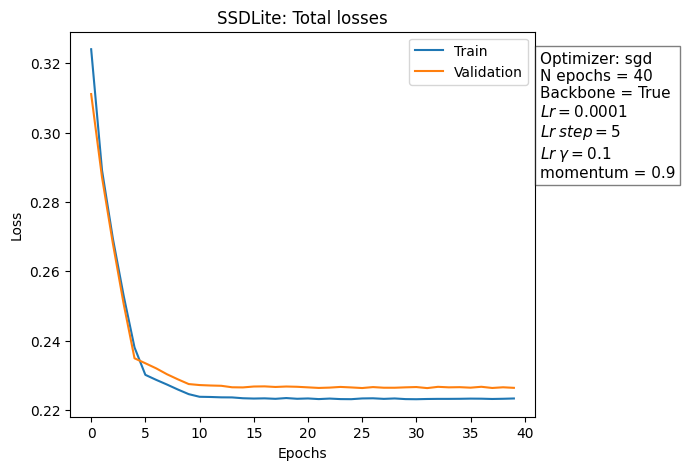

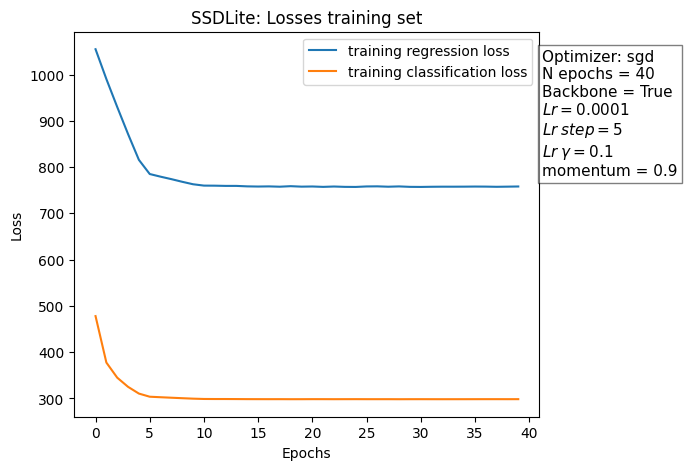

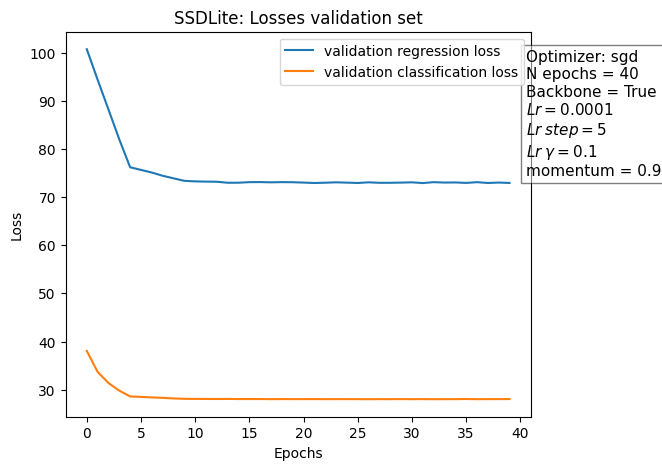

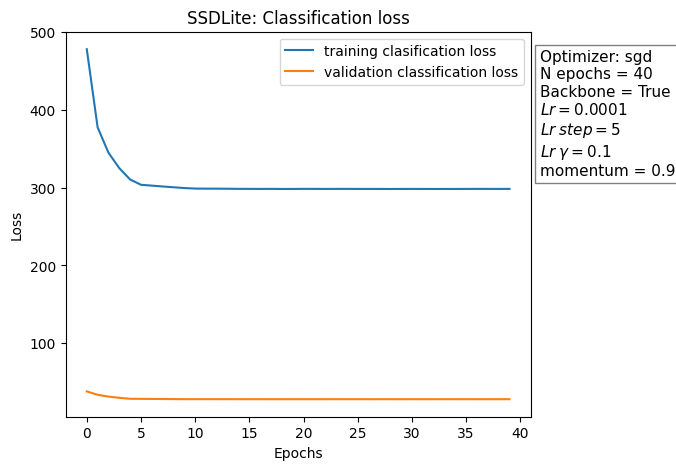

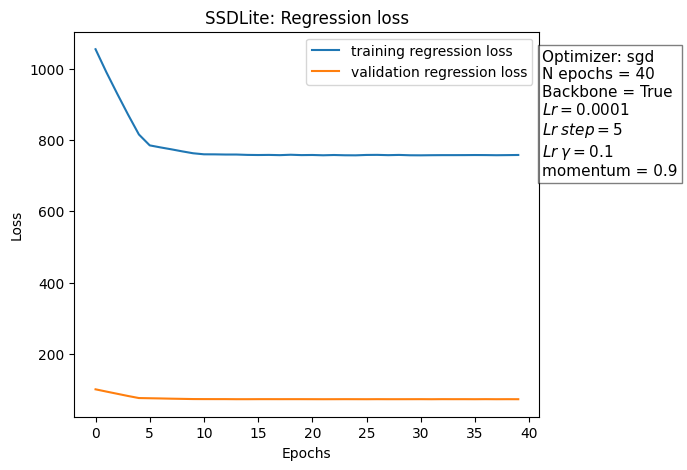

In [2]:
modelsFolder = "Results/FinalModels"
main_dir = "Figures"
os.makedirs(main_dir, exist_ok = True)

for modelFile in os.listdir(modelsFolder):
    path = os.path.join(modelsFolder, modelFile)
    checkpoint = torch.load(path, map_location=torch.device('cpu'))

    #model.load_state_dict(checkpoint['model'])
    
    txt = modelFile
    ## Folder saving
    dir_name = txt.split('.')[0]
    print(dir_name)
    final_dir = os.path.join(main_dir, dir_name)
    os.makedirs(final_dir, exist_ok = True)


    ##TEXT BOX
    x = txt.split('_') 
    model_title = x[0]
    optimizer = x[2]
    n_epochs = x[4]
    #set = x[5]
    backbone = x[7]
    lr = x[9]
    lr_step = x[11]
    lr_gamma = x[13]
    momentum = x[15]

    textstr = '\n'.join((
    #'Set: ' + set,
    'Optimizer: ' + optimizer,
    'N epochs = ' + n_epochs,
    'Backbone = ' + backbone, 
    r'$ Lr = $' + lr, 
    r'$ Lr \; step = $' + lr_step,
    r'$ Lr \; \gamma = $' + lr_gamma,
    'momentum = ' + momentum))
    props = dict(boxstyle='square', facecolor='white', alpha=0.5)

    fig0, ax0 = plt.subplots(figsize=(6, 5))

    # Plotting joint losses
    filename = "total_losses.png"
    
    box = ax0.text(1.01, 0.95, textstr, transform=ax0.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
    ax0.plot(checkpoint["losses_train"], label = 'Train')
    ax0.plot(checkpoint["losses_val"],  label = 'Validation')
    ax0.set_title(model_title+ ": Total losses")
    ax0.set_ylabel('Loss')
    ax0.set_xlabel('Epochs')
    ax0.legend()
    plt.savefig(os.path.join(final_dir, filename),  bbox_extra_artists=(box,), bbox_inches='tight')
    plt.show()
   
    regression_loss_train = [val.detach().cpu().numpy() for val in checkpoint["regression_loss_train"]]
    classification_loss_train = [val.detach().cpu().numpy() for val in checkpoint["classification_loss_train"]]

    regression_loss_val = [val.detach().cpu().numpy() for val in checkpoint["regression_loss_val"]]
    classification_loss_val = [val.detach().cpu().numpy() for val in checkpoint["classification_loss_val"]]

    # Plotting training set
    fig1, ax1 = plt.subplots(figsize=(6, 5))
    filename = "training_loss"
    box = ax1.text(1.005, 0.95, textstr, transform=ax0.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
    ax1.plot(regression_loss_train, label="training regression loss")
    ax1.plot(classification_loss_train, label="training classification loss")
    ax1.set_title(model_title +': Losses training set')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epochs') 
    ax1.legend()
    plt.savefig(os.path.join(final_dir, filename),  bbox_extra_artists=(box,), bbox_inches='tight')
    plt.show()

    # Plotting validation set
    fig2, ax2 = plt.subplots(figsize=(6, 5))
    filename = "validation_losses"
    box = ax2.text(0.97, 0.95, textstr, transform=ax0.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
    ax2.plot(regression_loss_val, label="validation regression loss")
    ax2.plot(classification_loss_val, label="validation classification loss")
    ax2.set_title(model_title +': Losses validation set')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epochs')
    ax2.legend()
    plt.savefig(os.path.join(final_dir, filename),  bbox_extra_artists=(box,), bbox_inches='tight')
    plt.show()

    # Plotting classification loss
    fig3, ax3 = plt.subplots(figsize=(6, 5))
    filename = "classification_losses"
    box = ax3.text(1, 0.95, textstr, transform=ax0.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
    ax3.plot(classification_loss_train, label="training clasification loss")
    ax3.plot(classification_loss_val, label="validation classification loss")
    ax3.set_title(model_title + ': Classification loss')
    ax3.set_ylabel('Loss')
    ax3.set_xlabel('Epochs')
    ax3.legend()
    plt.savefig(os.path.join(final_dir, filename),  bbox_extra_artists=(box,), bbox_inches='tight')
    plt.show()

    # Plotting regression loss
    fig4, ax4 = plt.subplots(figsize=(6, 5))
    filename = "reggresion_losses"
    box = ax4.text(1.005, 0.95, textstr, transform=ax0.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
    ax4.plot(regression_loss_train, label="training regression loss")
    ax4.plot(regression_loss_val, label="validation regression loss")
    ax4.set_title(model_title + ': Regression loss')
    ax4.set_ylabel('Loss')
    ax4.set_xlabel('Epochs')
    ax4.legend()
    plt.savefig(os.path.join(final_dir, filename),  bbox_extra_artists=(box,), bbox_inches='tight')
    plt.show()



